# Credit score classification
## 1st milestone

Authors: Zuzanna Piróg, Adrian Zaręba

In [267]:
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
from scipy import stats
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)



## Pobranie zbioru danych

In [268]:
df_original_dataset = pd.read_csv("train.csv")
dataset = df_original_dataset.copy()

In [269]:
#jak wygląda nasz zbiór
dataset.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


## Opisy kolumn
ID: Unique ID of the record <br>
Customer_ID: Unique ID of the customer <br>
Month: Month of the year <br>
Name: The name of the person <br>
Age: The age of the person <br>
SSN: Social Security Number of the person <br>
Occupation: The occupation of the person <br>
Annual_Income: The Annual Income of the person <br>
Monthly_Inhand_Salary: Monthly in-hand salary of the person <br>
Num_Bank_Accounts: The number of bank accounts of the person <br>
Num_Credit_Card: Number of credit cards the person is having <br>
Interest_Rate: The interest rate on the credit card of the person <br>
Num_of_Loan: The number of loans taken by the person from the bank <br>
Type_of_Loan: The types of loans taken by the person from the bank <br>
Delay_from_due_date: The average number of days delayed by the person from the date of payment <br>
Num_of_Delayed_Payment: Number of payments delayed by the person <br>
Changed_Credit_Card: The percentage change in the credit card limit of the person <br>
Num_Credit_Inquiries: The number of credit card inquiries by the person <br>
Credit_Mix: Classification of Credit Mix of the customer <br>
Outstanding_Debt: The outstanding balance of the person <br>
Credit_Utilization_Ratio: The credit utilization ratio of the credit card of the customer <br>
Credit_History_Age: The age of the credit history of the person <br>
Payment_of_Min_Amount: Yes if the person paid the minimum amount to be paid only, otherwise no. <br>
Total_EMI_per_month: The total EMI per month of the person <br>
Amount_invested_monthly: The monthly amount invested by the person <br>
Payment_Behaviour: The payment behaviour of the person <br>
Monthly_Balance: The monthly balance left in the account of the person <br>
Credit_Score: The credit score of the person <br>

## Eksploracyjna analiza danych

In [270]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [271]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


In [272]:
dataset.describe(exclude = np.number).T

,count,unique,top,freq
ID,100000,100000,0x2144e,1
Customer_ID,100000,12500,CUS_0xa7d4,8
Month,100000,8,August,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,17273.83,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


In [273]:
dataset.isna().sum()
# przy sprawdzeniu mamy informację że credit score nie ma wartóści NA

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

## Podział danych

In [274]:
from sklearn.model_selection import GroupShuffleSplit 

splitter = GroupShuffleSplit(test_size=.30, n_splits=5, random_state = 23)
split = splitter.split(dataset, groups=dataset['Customer_ID'])
train_inds, test_inds = next(split)

train1 = dataset.iloc[train_inds]
main_validate = dataset.iloc[test_inds]

In [275]:
"""splitter = GroupShuffleSplit(test_size=.30, n_splits=5, random_state = 23)
split = splitter.split(train1, groups=train1['Customer_ID'])
train_inds, test_inds = next(split)

train = train1.iloc[train_inds]
main_validate = train1.iloc[test_inds]"""

"splitter = GroupShuffleSplit(test_size=.30, n_splits=5, random_state = 23)\nsplit = splitter.split(train1, groups=train1['Customer_ID'])\ntrain_inds, test_inds = next(split)\n\ntrain = train1.iloc[train_inds]\nmain_validate = train1.iloc[test_inds]"

In [276]:
dataset = train1


## Zmiana typu danych w kolumnach

In [277]:
#przypomnijmy jakie kolumny są typu object
dataset.select_dtypes('O').info()
#niektóre z nich powinny być zamienione na integer lub float, chociażby w przypadku age lub monthly_balance

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       70000 non-null  object
 1   Customer_ID              70000 non-null  object
 2   Month                    70000 non-null  object
 3   Name                     62924 non-null  object
 4   Age                      70000 non-null  object
 5   SSN                      70000 non-null  object
 6   Occupation               70000 non-null  object
 7   Annual_Income            70000 non-null  object
 8   Num_of_Loan              70000 non-null  object
 9   Type_of_Loan             61856 non-null  object
 10  Num_of_Delayed_Payment   65046 non-null  object
 11  Changed_Credit_Limit     70000 non-null  object
 12  Credit_Mix               70000 non-null  object
 13  Outstanding_Debt         70000 non-null  object
 14  Credit_History_Age       63633 non-nul

In [278]:
#sprawdźmy czy poza wartościami Nan występują jakieś dziwne wartości w tych kolumnach
kolumny_object = dataset.select_dtypes('O').columns
kolumny_object

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Num_of_Loan', 'Type_of_Loan',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [279]:
for kolumna in kolumny_object:
    print("Nazwa kolumny:" + kolumna)
    print("--"*15)
    print(dataset[kolumna].value_counts(dropna = False))
    print("--"*15, '\n')

Nazwa kolumny:ID
------------------------------
0x1e019    1
0x106f9    1
0x14018    1
0x106ed    1
0x1fd54    1
          ..
0x21ee5    1
0x17e0e    1
0x19e25    1
0x9df7     1
0x566b     1
Name: ID, Length: 70000, dtype: int64
------------------------------ 

Nazwa kolumny:Customer_ID
------------------------------
CUS_0xa7d4    8
CUS_0x6ae4    8
CUS_0x774     8
CUS_0x88a     8
CUS_0x6fbe    8
             ..
CUS_0xad1b    8
CUS_0x7fa     8
CUS_0x754c    8
CUS_0x960b    8
CUS_0x87c9    8
Name: Customer_ID, Length: 8750, dtype: int64
------------------------------ 

Nazwa kolumny:Month
------------------------------
August      8750
May         8750
January     8750
February    8750
April       8750
July        8750
March       8750
June        8750
Name: Month, dtype: int64
------------------------------ 

Nazwa kolumny:Name
------------------------------
NaN                 7076
Jessica Wohlt         38
Michaelr              37
Ryan Vlastelicad      36
Phila                 35
     

Jak możemy zaobserwować jakość naszych danych nie jest idealna.
Zastanawiające wydają się być kolumna Age i jej skrajne wartości, wartości: #F%$D@*&8 w kolumnie security number oraz chociażby !@9#%8 w kolumnie Payment_Behaviour


In [280]:
#Zatem pozbądźmy się ich
dataset = dataset.applymap(lambda x: x if x is np.NaN or not isinstance(x, str) else str(x).strip('_ , " ')).replace(['', 'nan', '!@9#%8', '#F%$D@*&8'], np.NaN)

In [281]:
dataset

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,NaN,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,7,11.5,3.0,NaN,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,7,11.5,3.0,NaN,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",27,6,11.5,3.0,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,NaN,11.5,3.0,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [282]:
dataset.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         7076
Age                             0
SSN                          3905
Occupation                   4935
Annual_Income                   0
Monthly_Inhand_Salary       10502
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                 8144
Delay_from_due_date             0
Num_of_Delayed_Payment       4954
Changed_Credit_Limit         1463
Num_Credit_Inquiries         1385
Credit_Mix                  14196
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           6367
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      3149
Payment_Behaviour            5353
Monthly_Balance               802
Credit_Score                    0
dtype: int64

Jak możemy zauważyć liczba brakujących informacji się zwiększyła ale usunęliśmy mylące informacje

In [283]:
#Teraz zmieńmy typy danych do najlepszego typu dla danej kolumny

#zmiania z hex(szesnastkowy) na system dziesiętny
dataset['ID'] = dataset.ID.apply(lambda x: int(x, 16))
#zmiania z hex(szesnastkowy) na system dziesiętny ale pierwsze cztery znaki w kolumnie nie są liczbowe
dataset['Customer_ID'] = dataset.Customer_ID.apply(lambda x: int(x[4:], 16))
#zmiana formatu czasu
dataset['Month'] = pd.to_datetime(dataset.Month, format='%B').dt.month
#zmiana na int 
dataset['Age'] = dataset.Age.astype(int)  
dataset['Num_of_Loan'] = dataset.Num_of_Loan.astype(int) 
#zmiana na float
dataset['SSN'] = dataset.SSN.apply(lambda x: x if x is np.NaN else int(str(x).replace('-', ''))).astype(float)
dataset['Annual_Income'] = dataset.Annual_Income.astype(float)
dataset['Num_of_Delayed_Payment'] = dataset.Num_of_Delayed_Payment.astype(float)
dataset['Changed_Credit_Limit'] = dataset.Changed_Credit_Limit.astype(float)
dataset['Outstanding_Debt'] = dataset.Outstanding_Debt.astype(float)
dataset['Amount_invested_monthly'] = dataset.Amount_invested_monthly.astype(float)
dataset['Monthly_Balance'] = dataset.Monthly_Balance.astype(float)

In [284]:
#Zmiana zapisu 22 Years and 1 Months

def Zmiana_miesiecy(x):
    #funkcja zwraca wynik w liczbie miesiecy
    if pd.notnull(x):
        num1 = int(x.split(' ')[0])
        num2 = int(x.split(' ')[3])
      
        return (num1*12)+num2
    else:
        return x

In [285]:
dataset['Credit_History_Age'] = dataset.Credit_History_Age.apply(lambda x: Zmiana_miesiecy(x)).astype(float)
dataset

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23,821000265.0,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,11.27,4.0,NaN,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23,821000265.0,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,-500,821000265.0,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,NaN,4.0,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23,821000265.0,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23,821000265.0,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25,78735990.0,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,7.0,11.50,3.0,NaN,502.38,34.663572,378.0,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25,78735990.0,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,7.0,11.50,3.0,NaN,502.38,40.565631,379.0,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25,78735990.0,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",27,6.0,11.50,3.0,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25,78735990.0,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,NaN,11.50,3.0,Good,502.38,33.638208,381.0,No,35.104023,251.672582,Low_spent_Large_value_payments,319.164979,Standard


In [286]:
dataset.groupby('Customer_ID')['Credit_History_Age'].apply(list)
#dla danego customer mamy wiele wpisów

Customer_ID
1006     [182.0, 183.0, 184.0, 185.0, 186.0, 187.0, 188...
1008     [292.0, 293.0, 294.0, nan, 296.0, 297.0, 298.0...
1009     [331.0, 332.0, 333.0, 334.0, 335.0, 336.0, 337...
1013     [311.0, 312.0, 313.0, 314.0, 315.0, 316.0, 317...
1015        [nan, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, nan]
                               ...                        
50983    [nan, nan, 216.0, 217.0, 218.0, 219.0, 220.0, ...
50984    [157.0, 158.0, 159.0, nan, 161.0, 162.0, nan, ...
50992    [159.0, 160.0, 161.0, 162.0, 163.0, nan, 165.0...
50996    [206.0, 207.0, 208.0, 209.0, 210.0, 211.0, 212...
50999    [226.0, 227.0, 228.0, 229.0, 230.0, 231.0, 232...
Name: Credit_History_Age, Length: 8750, dtype: object

In [287]:
dataset.groupby('Customer_ID')['Type_of_Loan'].value_counts(dropna=False)

Customer_ID  Type_of_Loan                                                                                                       
1006         Credit-Builder Loan, and Payday Loan                                                                                   8
1008         NaN                                                                                                                    8
1009         Credit-Builder Loan, Student Loan, Not Specified, and Student Loan                                                     8
1013         Home Equity Loan, Mortgage Loan, Not Specified, and Personal Loan                                                      8
1015         Personal Loan, Mortgage Loan, Not Specified, Auto Loan, Debt Consolidation Loan, Credit-Builder Loan, and Auto Loan    8
                                                                                                                                   ..
50983        Student Loan, and Mortgage Loan                       

In [288]:
dataset.groupby('Customer_ID')['Type_of_Loan'].apply(list)

Customer_ID
1006     [Credit-Builder Loan, and Payday Loan, Credit-...
1008              [nan, nan, nan, nan, nan, nan, nan, nan]
1009     [Credit-Builder Loan, Student Loan, Not Specif...
1013     [Home Equity Loan, Mortgage Loan, Not Specifie...
1015     [Personal Loan, Mortgage Loan, Not Specified, ...
                               ...                        
50983    [Student Loan, and Mortgage Loan, Student Loan...
50984    [Home Equity Loan, Mortgage Loan, Payday Loan,...
50992    [Student Loan, Credit-Builder Loan, Mortgage L...
50996             [nan, nan, nan, nan, nan, nan, nan, nan]
50999    [Credit-Builder Loan, Credit-Builder Loan, Cre...
Name: Type_of_Loan, Length: 8750, dtype: object

In [289]:
#nietkóre dane znajdujące się w kolumnie są wymienione po przecinku albo po słowie and
#zobaczmy z jakimi kategoriami mamy doczynienia

def get_Diff_Values_Colum(df_column, diff_value = []):   
    column = df_column.dropna()
    for i in column:
        if ',' not in i and i not in diff_value:
            diff_value.append(i)
        else:
            for data in map(lambda x:x.strip(), i.replace('and','').split(',')):
                if not data in diff_value:
                    diff_value.append(data)
    return dict(enumerate(sorted(diff_value)))

In [290]:
get_Diff_Values_Colum(dataset['Type_of_Loan'])

{0: 'Auto Loan',
 1: 'Credit-Builder Loan',
 2: 'Debt Consolidation Loan',
 3: 'Home Equity Loan',
 4: 'Mortgage Loan',
 5: 'Not Specified',
 6: 'Payday Loan',
 7: 'Personal Loan',
 8: 'Student Loan'}

In [291]:
#podsumujmy zmienione typy kolumn:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        70000 non-null  int64  
 1   Customer_ID               70000 non-null  int64  
 2   Month                     70000 non-null  int64  
 3   Name                      62924 non-null  object 
 4   Age                       70000 non-null  int32  
 5   SSN                       66095 non-null  float64
 6   Occupation                65065 non-null  object 
 7   Annual_Income             70000 non-null  float64
 8   Monthly_Inhand_Salary     59498 non-null  float64
 9   Num_Bank_Accounts         70000 non-null  int64  
 10  Num_Credit_Card           70000 non-null  int64  
 11  Interest_Rate             70000 non-null  int64  
 12  Num_of_Loan               70000 non-null  int32  
 13  Type_of_Loan              61856 non-null  object 
 14  Delay_

## EDA (Exploratory Data Analysis)
### kolumny typu object
Wyszukamy wartosci NaN a nastepnie uzupelnimy je na podstawie Costumer_ID Group

In [292]:
def NaN_Values_By_Group(df, groupby, column, inplace = True):
    """funkcja usuwa braki, dzieki zagniezdzonej funkcji oraz wyswietla dane przed i po transformacji dla danej kolumny"""
    def NaN_fill_moda(df, groupby, column, inplace = True):
        """funkcja zmienia lokalny NaN przy pomocy mody"""
        #zmiana None to np.NaN
        if df[column].isin([None]).sum():
            df[column][df[column].isin([None])] = np.NaN
        #zmieniamy przez lokalna moda
        rezultat = df.groupby(groupby)[column].transform(lambda x: x.fillna(stats.mode(x)[0][0]))
        
        #inplace
        if inplace:
            df[column]=rezultat
        else:
            return rezultat
    #Funkcja glowna - wizualizacja
    if inplace:
        #przed zastapieniem wartosci
        x = df[column].value_counts(dropna=False).head(1)
        print(f'\nPrzed zaadresowaniem Nan {column}:', [x if x.index[0] is np.NaN or x.index[0] is None else 'Brak NaN Values'] , end='\n')
        a = df.groupby(groupby)[column].apply(list) 
        print(f'\nPrzyklad przed: {column}:\n', *a.head().values, sep='\n', end='\n')
        
        #zastepujemy
        NaN_fill_moda(df, groupby, column, inplace)
        
        #po zastapieniu wartosci
        y = df[column].value_counts(dropna=False).head(1)
        print(f'\nPo zaadresowaniu NaN {column}:', [y if y.index[0] is np.NaN or x.index[0] is None else 'No NaN Value'] , end='\n')
        b = df.groupby(groupby)[column].apply(list)
        print(f'\nPrzyklad po: {column}:\n', *b.head().values, sep='\n', end='\n')
    else:
        return NaN_fill_moda(df, groupby, column, inplace)

In [293]:
#zobaczmy jak wygladaja blizej kolumny typu object
dataset.describe(include='O').T

,count,unique,top,freq
Name,62924,7536,Jessica Wohlt,38
Occupation,65065,15,Engineer,4609
Type_of_Loan,61856,4579,Not Specified,1056
Credit_Mix,55804,3,Standard,25476
Payment_of_Min_Amount,70000,3,Yes,36448
Payment_Behaviour,64647,6,Low_spent_Small_value_payments,17746
Credit_Score,70000,3,Standard,37336


Zastosujmy napisana funkcje dla kolumn
#### Name

In [294]:
dataset['Name'].value_counts(dropna=False).head()

NaN                 7076
Jessica Wohlt         38
Michaelr              37
Ryan Vlastelicad      36
Phila                 35
Name: Name, dtype: int64

In [295]:
NaN_Values_By_Group(dataset, 'Customer_ID', 'Name')


Przed zaadresowaniem Nan Name: [NaN    7076
Name: Name, dtype: int64]

Przyklad przed: Name:

['Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', nan]
['Koht', 'Koht', 'Koht', 'Koht', 'Koht', 'Koht', 'Koht', nan]
['Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd']
['Natalie Thomasp', 'Natalie Thomasp', 'Natalie Thomasp', 'Natalie Thomasp', 'Natalie Thomasp', 'Natalie Thomasp', 'Natalie Thomasp', 'Natalie Thomasp']
[nan, 'Kellya', 'Kellya', 'Kellya', 'Kellya', 'Kellya', 'Kellya', 'Kellya']

Po zaadresowaniu NaN Name: ['No NaN Value']

Przyklad po: Name:

['Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb']
['Koht', 'Koht', 'Koht', 'Koht', 'Koht', 'Koht', 'Koht', 'Koht']
['Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd']
['Natalie Thomasp', 'Natalie Thomasp', 'Natalie

#### Occupation

In [296]:
dataset['Occupation'].value_counts(dropna=False)

NaN              4935
Engineer         4609
Lawyer           4579
Media_Manager    4493
Teacher          4416
Accountant       4399
Mechanic         4390
Developer        4368
Scientist        4362
Doctor           4356
Journalist       4325
Entrepreneur     4320
Architect        4291
Manager          4170
Writer           4034
Musician         3953
Name: Occupation, dtype: int64

In [297]:
NaN_Values_By_Group(dataset, 'Customer_ID', 'Occupation')


Przed zaadresowaniem Nan Occupation: [NaN    4935
Name: Occupation, dtype: int64]

Przyklad przed: Occupation:

['Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist', nan, 'Journalist', 'Journalist']
['Developer', 'Developer', 'Developer', 'Developer', 'Developer', 'Developer', 'Developer', 'Developer']
['Accountant', nan, 'Accountant', 'Accountant', 'Accountant', 'Accountant', 'Accountant', 'Accountant']
[nan, 'Mechanic', 'Mechanic', 'Mechanic', 'Mechanic', 'Mechanic', 'Mechanic', 'Mechanic']
['Entrepreneur', 'Entrepreneur', 'Entrepreneur', 'Entrepreneur', 'Entrepreneur', 'Entrepreneur', 'Entrepreneur', 'Entrepreneur']

Po zaadresowaniu NaN Occupation: ['No NaN Value']

Przyklad po: Occupation:

['Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist']
['Developer', 'Developer', 'Developer', 'Developer', 'Developer', 'Developer', 'Developer', 'Developer']
['Accountant', 'Accountant', 'Accountant', 'Accountant', 'A

#### Type_of_Loan

In [298]:
dataset.groupby('Customer_ID')['Type_of_Loan'].value_counts(dropna=False)

Customer_ID  Type_of_Loan                                                                                                       
1006         Credit-Builder Loan, and Payday Loan                                                                                   8
1008         NaN                                                                                                                    8
1009         Credit-Builder Loan, Student Loan, Not Specified, and Student Loan                                                     8
1013         Home Equity Loan, Mortgage Loan, Not Specified, and Personal Loan                                                      8
1015         Personal Loan, Mortgage Loan, Not Specified, Auto Loan, Debt Consolidation Loan, Credit-Builder Loan, and Auto Loan    8
                                                                                                                                   ..
50983        Student Loan, and Mortgage Loan                       

In [299]:
dataset['Type_of_Loan'].replace([np.NaN], 'Not Specified', inplace=True)

#### Credit_Mix

In [300]:
dataset['Credit_Mix'].value_counts(dropna=False)

Standard    25476
Good        17217
NaN         14196
Bad         13111
Name: Credit_Mix, dtype: int64

In [301]:
NaN_Values_By_Group(dataset, 'Customer_ID', 'Credit_Mix')


Przed zaadresowaniem Nan Credit_Mix: ['Brak NaN Values']

Przyklad przed: Credit_Mix:

['Standard', 'Standard', 'Standard', 'Standard', 'Standard', nan, 'Standard', 'Standard']
[nan, 'Standard', 'Standard', nan, 'Standard', 'Standard', 'Standard', 'Standard']
['Standard', nan, 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard']
[nan, 'Good', nan, 'Good', 'Good', nan, 'Good', nan]
['Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', nan, nan]

Po zaadresowaniu NaN Credit_Mix: ['No NaN Value']

Przyklad po: Credit_Mix:

['Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard']
['Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard']
['Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard']
['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good']
['Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Stand

#### Payment_of_Min_Amount

In [302]:
dataset['Payment_of_Min_Amount'].value_counts(dropna=False)
#nie musimy nic robic

Yes    36448
No     25175
NM      8377
Name: Payment_of_Min_Amount, dtype: int64

#### Payment_Behaviour

In [303]:
dataset['Payment_Behaviour'].value_counts(dropna=False)

Low_spent_Small_value_payments      17746
High_spent_Medium_value_payments    12284
Low_spent_Medium_value_payments      9730
High_spent_Large_value_payments      9646
High_spent_Small_value_payments      7922
Low_spent_Large_value_payments       7319
NaN                                  5353
Name: Payment_Behaviour, dtype: int64

In [304]:
NaN_Values_By_Group(dataset, 'Customer_ID', 'Payment_Behaviour')


Przed zaadresowaniem Nan Payment_Behaviour: ['Brak NaN Values']

Przyklad przed: Payment_Behaviour:

['High_spent_Medium_value_payments', 'Low_spent_Medium_value_payments', 'Low_spent_Small_value_payments', 'High_spent_Small_value_payments', 'Low_spent_Large_value_payments', nan, 'Low_spent_Large_value_payments', 'Low_spent_Small_value_payments']
['High_spent_Small_value_payments', 'Low_spent_Large_value_payments', 'Low_spent_Small_value_payments', 'High_spent_Small_value_payments', 'High_spent_Medium_value_payments', 'High_spent_Small_value_payments', 'Low_spent_Large_value_payments', 'Low_spent_Large_value_payments']
['High_spent_Medium_value_payments', 'High_spent_Large_value_payments', 'High_spent_Medium_value_payments', 'Low_spent_Large_value_payments', 'Low_spent_Medium_value_payments', 'Low_spent_Large_value_payments', nan, 'High_spent_Large_value_payments']
['High_spent_Small_value_payments', 'High_spent_Medium_value_payments', 'Low_spent_Small_value_payments', 'Low_spent_Larg

### Min-Max wartosci w kolumnach numerycznych oraz braki NaN

In [305]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,70000.0,8.100387e+04,4.314827e+04,5.634000e+03,4.376175e+04,8.105150e+04,1.182932e+05,1.556290e+05
Customer_ID,70000.0,2.587703e+04,1.428213e+04,1.006000e+03,1.371700e+04,2.565850e+04,3.815700e+04,5.099900e+04
Month,70000.0,4.500000e+00,2.291304e+00,1.000000e+00,2.750000e+00,4.500000e+00,6.250000e+00,8.000000e+00
Age,70000.0,1.099463e+02,6.812440e+02,-5.000000e+02,2.400000e+01,3.300000e+01,4.200000e+01,8.698000e+03
SSN,66095.0,5.014834e+08,2.909328e+08,4.033120e+05,2.494883e+08,5.017250e+08,7.572079e+08,9.999272e+08
Annual_Income,70000.0,1.804177e+05,1.451721e+06,7.006520e+03,1.954305e+04,3.778830e+04,7.334048e+04,2.418881e+07
Monthly_Inhand_Salary,59498.0,4.232670e+03,3.214279e+03,3.195562e+02,1.632830e+03,3.123003e+03,6.009223e+03,1.520463e+04
Num_Bank_Accounts,70000.0,1.722081e+01,1.186590e+02,-1.000000e+00,3.000000e+00,6.000000e+00,7.000000e+00,1.798000e+03
Num_Credit_Card,70000.0,2.233851e+01,1.286176e+02,0.000000e+00,4.000000e+00,5.000000e+00,7.000000e+00,1.499000e+03
Interest_Rate,70000.0,7.204726e+01,4.624691e+02,1.000000e+00,7.000000e+00,1.300000e+01,2.000000e+01,5.788000e+03


In [306]:
#liczba klientow w bazie banku
dataset['Customer_ID'].nunique()

8750

In [307]:
#Sprawdzamy Outliery
def znajdz_iqr_dolne_gorne(df, column, multiply=1.5):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 -q1
    
    lower = q1-iqr*multiply
    upper = q3+iqr*multiply
    affect = df.loc[(df[column]<lower)|(df[column]>upper)].shape
    print('Outliers:', affect)
    return lower, upper

In [308]:
def nowe_numeryczne_grupowe_wartosci(df, groupby, column, inplace=True):      
    import scipy.stats as stats 

    #znajdujemy zakres min i max w kolumnie
    def get_group_min_max(df, groupby, column):            
        cur = df[df[column].notna()].groupby(groupby)[column].apply(list)
        x, y = cur.apply(lambda x: stats.mode(x)).apply([min, max])
        return x[0][0], y[0][0]
    
   #zmieniamy na najczestsza wartosc
    def make_group_NaN_and_fill_mode(df, groupby, column, inplace=True):
        df_dropped = df[df[column].notna()].groupby(groupby)[column].apply(list)
        x, y = df_dropped.apply(lambda x: stats.mode(x)).apply([min, max])
        mini, maxi = x[0][0], y[0][0]

        # zmieniamy zle wartosci na Nan
        col = df[column].apply(lambda x: np.NaN if ((x<mini)|(x>maxi)) else x)

        # zastepujemy lokalna moda
        mode_by_group = df.groupby(groupby)[column].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN)
        result = col.fillna(mode_by_group)

        # inplace
        if inplace:
            df[column]=result
        else:
            return result
        
    
    # glowna funckja - wizualizacja     
    if inplace:   
        print("\nIstniejace Min, Max wartosci:", df[column].apply([min, max]), sep='\n', end='\n')       
        mini, maxi = get_group_min_max(df, groupby, column)        
        print(f"\nGroupby by {groupby}'s Aktualne min, max wartosci:", f'min:\t{mini},\nmax:\t{ maxi}', sep='\n', end='\n')
        
        # Before Assigning Wrong values      
        x = df[column].value_counts(dropna=False).head(1)
        print(f'\nPrzed zmiana Min, Max {column}:', [x if x.index[0] is np.NaN or x.index[0] is None else 'No NaN Value'] , end='\n')
        
        a = df.groupby(groupby)[column].apply(list) 
        print(f'\nPrzyklad przed {column}:\n', *a.head().values, sep='\n', end='\n')
        
        # Assigning
        make_group_NaN_and_fill_mode(df, groupby, column, inplace)
        
        # After Assigning Wrong values
        y = df[column].value_counts(dropna=False).head(1)
        print(f'\nPo zmianie  Min, Max {column}:', [y if y.index[0] is np.NaN or x.index[0] is None else 'No NaN Value'] , end='\n')
        
        b = df.groupby(groupby)[column].apply(list)
        print(f'\nPrzyklad po {column}:\n', *b.head().values, sep='\n', end='\n')
    else:   
        # Show
        return make_group_NaN_and_fill_mode(df, groupby, column, inplace)

#### ID

In [309]:
dataset['ID'].nunique()

70000

#### Month

In [310]:
dataset['Month'].value_counts()
#wszystko w porzadku bo kazdy uzytkownik ma dane dla osmiu miesiecy

1    8750
2    8750
3    8750
4    8750
5    8750
6    8750
7    8750
8    8750
Name: Month, dtype: int64

#### Age

In [311]:
nowe_numeryczne_grupowe_wartosci(dataset, 'Customer_ID', 'Age')


Istniejace Min, Max wartosci:
min    -500
max    8698
Name: Age, dtype: int64

Groupby by Customer_ID's Aktualne min, max wartosci:
min:	14,
max:	56

Przed zmiana Min, Max Age: ['No NaN Value']

Przyklad przed Age:

[37, 38, 38, 8153, 38, 38, 38, 38]
[3452, 37, 37, 37, 37, 37, 37, 37]
[22, 22, 22, 22, 22, 22, 22, 23]
[30, 30, 30, 30, 30, 30, 30, 30]
[25, 25, 25, 25, 25, 25, 25, 25]

Po zmianie  Min, Max Age: ['No NaN Value']

Przyklad po Age:

[37.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0]
[37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0]
[22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 23.0]
[30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0]
[25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0]


#### SSN

In [312]:
dataset.SSN.value_counts(dropna=False)

NaN            3905
452268614.0       8
262530576.0       8
708443082.0       8
367852447.0       8
               ... 
37332929.0        5
642737670.0       4
331281921.0       4
286449634.0       4
753722651.0       4
Name: SSN, Length: 8751, dtype: int64

In [313]:
nowe_numeryczne_grupowe_wartosci(dataset, 'Customer_ID', 'SSN')


Istniejace Min, Max wartosci:
min       403312.0
max    999927186.0
Name: SSN, dtype: float64

Groupby by Customer_ID's Aktualne min, max wartosci:
min:	403312.0,
max:	999927186.0

Przed zmiana Min, Max SSN: ['No NaN Value']

Przyklad przed SSN:

[354656948.0, 354656948.0, 354656948.0, 354656948.0, 354656948.0, 354656948.0, 354656948.0, 354656948.0]
[802194704.0, nan, 802194704.0, 802194704.0, 802194704.0, 802194704.0, 802194704.0, 802194704.0]
[nan, nan, 891062189.0, 891062189.0, 891062189.0, 891062189.0, 891062189.0, 891062189.0]
[335624040.0, 335624040.0, 335624040.0, 335624040.0, 335624040.0, 335624040.0, 335624040.0, 335624040.0]
[966789490.0, 966789490.0, 966789490.0, 966789490.0, 966789490.0, 966789490.0, 966789490.0, 966789490.0]

Po zmianie  Min, Max SSN: ['No NaN Value']

Przyklad po SSN:

[354656948.0, 354656948.0, 354656948.0, 354656948.0, 354656948.0, 354656948.0, 354656948.0, 354656948.0]
[802194704.0, 802194704.0, 802194704.0, 802194704.0, 802194704.0, 802194704.0, 8021

#### Annual income

In [314]:
dataset.Annual_Income.value_counts(dropna=False)

32543.38       16
22434.16       16
17816.75       16
17273.83       16
40341.16       16
               ..
2568033.00      1
19968464.00     1
8651183.00      1
3987894.00      1
19134169.00     1
Name: Annual_Income, Length: 9452, dtype: int64

In [315]:
nowe_numeryczne_grupowe_wartosci(dataset, 'Customer_ID', 'Annual_Income')


Istniejace Min, Max wartosci:
min        7006.52
max    24188807.00
Name: Annual_Income, dtype: float64

Groupby by Customer_ID's Aktualne min, max wartosci:
min:	7006.52,
max:	179987.28

Przed zmiana Min, Max Annual_Income: ['No NaN Value']

Przyklad przed Annual_Income:

[16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18]
[33540.43, 33540.43, 33540.43, 33540.43, 33540.43, 33540.43, 33540.43, 33540.43]
[80983.64, 80983.64, 80983.64, 80983.64, 80983.64, 80983.64, 80983.64, 80983.64]
[30022.71, 30022.71, 30022.71, 30022.71, 30022.71, 30022.71, 30022.71, 30022.71]
[26104.48, 26104.48, 26104.48, 26104.48, 26104.48, 26104.48, 26104.48, 26104.48]

Po zmianie  Min, Max Annual_Income: ['No NaN Value']

Przyklad po Annual_Income:

[16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18]
[33540.43, 33540.43, 33540.43, 33540.43, 33540.43, 33540.43, 33540.43, 33540.43]
[80983.64, 80983.64, 80983.64, 80983.64, 80983.64, 80983.64, 80983.64, 8098

#### Monthly_Inhand_Salary

In [316]:
dataset.Monthly_Inhand_Salary.value_counts(dropna=False)

NaN            10502
6082.187500       15
6358.956667       15
536.431250        12
2557.861667        9
               ...  
1496.152099        1
2539.071951        1
1693.936667        1
1316.334167        1
538.420000         1
Name: Monthly_Inhand_Salary, Length: 9261, dtype: int64

In [317]:
nowe_numeryczne_grupowe_wartosci(dataset, 'Customer_ID', 'Monthly_Inhand_Salary')


Istniejace Min, Max wartosci:
min      319.556250
max    15204.633333
Name: Monthly_Inhand_Salary, dtype: float64

Groupby by Customer_ID's Aktualne min, max wartosci:
min:	319.55625,
max:	15204.633333333331

Przed zmiana Min, Max Monthly_Inhand_Salary: ['No NaN Value']

Przyklad przed Monthly_Inhand_Salary:

[1331.3483333333334, 1331.3483333333334, 1331.3483333333334, 1331.3483333333334, 1331.3483333333334, 1331.3483333333334, 1331.3483333333334, 1331.3483333333334]
[2655.035833333333, 2655.035833333333, 2655.035833333333, 2655.035833333333, 2655.035833333333, 2655.035833333333, 2655.035833333333, 2655.035833333333]
[6692.636666666666, 6692.636666666666, 6692.636666666666, 6692.636666666666, 6692.636666666666, 6692.636666666666, 6692.636666666666, 6692.636666666666]
[2684.8925, nan, 2684.8925, 2684.8925, 2684.8925, 2684.8925, 2684.8925, 2684.8925]
[1995.3733333333328, 1995.3733333333328, 1995.3733333333328, 1995.3733333333328, 1995.3733333333328, 1995.3733333333328, 1995.373333333332

#### Num_Bank_Accounts

In [318]:
dataset.Num_Bank_Accounts.value_counts(dropna=False)

8       8966
7       8952
6       8947
4       8676
3       8480
        ... 
921        1
1049       1
1113       1
1241       1
1727       1
Name: Num_Bank_Accounts, Length: 738, dtype: int64

In [319]:
nowe_numeryczne_grupowe_wartosci(dataset, 'Customer_ID', 'Num_Bank_Accounts')


Istniejace Min, Max wartosci:
min      -1
max    1798
Name: Num_Bank_Accounts, dtype: int64

Groupby by Customer_ID's Aktualne min, max wartosci:
min:	-1,
max:	10

Przed zmiana Min, Max Num_Bank_Accounts: ['No NaN Value']

Przyklad przed Num_Bank_Accounts:

[9, 9, 9, 9, 9, 9, 9, 9]
[6, 6, 6, 6, 6, 6, 6, 6]
[6, 6, 6, 6, 6, 6, 6, 6]
[3, 3, 3, 3, 3, 3, 3, 3]
[4, 4, 4, 4, 4, 4, 4, 4]

Po zmianie  Min, Max Num_Bank_Accounts: ['No NaN Value']

Przyklad po Num_Bank_Accounts:

[9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0]
[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]
[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]
[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]


#### Num_Credit_Card

In [320]:
dataset.Num_Credit_Card.value_counts(dropna=False)

5       12818
6       11749
7       11494
4        9983
3        9414
        ...  
1380        1
1444        1
848         1
592         1
235         1
Name: Num_Credit_Card, Length: 972, dtype: int64

In [321]:
nowe_numeryczne_grupowe_wartosci(dataset, 'Customer_ID', 'Num_Credit_Card')


Istniejace Min, Max wartosci:
min       0
max    1499
Name: Num_Credit_Card, dtype: int64

Groupby by Customer_ID's Aktualne min, max wartosci:
min:	0,
max:	11

Przed zmiana Min, Max Num_Credit_Card: ['No NaN Value']

Przyklad przed Num_Credit_Card:

[6, 6, 6, 6, 6, 6, 6, 6]
[3, 3, 3, 3, 3, 3, 3, 3]
[3, 3, 3, 3, 725, 3, 3, 3]
[7, 7, 7, 7, 7, 7, 7, 7]
[4, 4, 37, 4, 4, 4, 4, 4]

Po zmianie  Min, Max Num_Credit_Card: ['No NaN Value']

Przyklad po Num_Credit_Card:

[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]
[7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0]
[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]


#### Interest_Rate

In [322]:
dataset.Interest_Rate.value_counts(dropna=False)

5       3541
8       3440
6       3356
11      3260
7       3252
        ... 
5207       1
5079       1
981        1
3028       1
3902       1
Name: Interest_Rate, Length: 1290, dtype: int64

In [323]:
nowe_numeryczne_grupowe_wartosci(dataset, 'Customer_ID', 'Interest_Rate')


Istniejace Min, Max wartosci:
min       1
max    5788
Name: Interest_Rate, dtype: int64

Groupby by Customer_ID's Aktualne min, max wartosci:
min:	1,
max:	34

Przed zmiana Min, Max Interest_Rate: ['No NaN Value']

Przyklad przed Interest_Rate:

[22, 22, 22, 22, 22, 22, 22, 22]
[17, 17, 17, 17, 17, 17, 17, 17]
[15, 15, 15, 15, 15, 15, 15, 15]
[6, 6, 6, 6, 2056, 6, 6, 6]
[14, 14, 14, 14, 14, 14, 14, 14]

Po zmianie  Min, Max Interest_Rate: ['No NaN Value']

Przyklad po Interest_Rate:

[22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0]
[17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0]
[15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0]
[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]
[14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0]


#### Num_of_Loan

In [324]:
dataset.Num_of_Loan.value_counts(dropna=False)

2       10704
3       10516
4       10344
0        7810
1        7302
        ...  
280         1
344         1
1048        1
1112        1
1279        1
Name: Num_of_Loan, Length: 304, dtype: int64

In [325]:
nowe_numeryczne_grupowe_wartosci(dataset, 'Customer_ID', 'Num_of_Loan')


Istniejace Min, Max wartosci:
min    -100
max    1496
Name: Num_of_Loan, dtype: int64

Groupby by Customer_ID's Aktualne min, max wartosci:
min:	0,
max:	9

Przed zmiana Min, Max Num_of_Loan: ['No NaN Value']

Przyklad przed Num_of_Loan:

[2, 2, 2, 2, 2, 2, 2, 2]
[0, 0, 0, 0, 0, 0, 0, 0]
[4, 4, 4, 4, 4, 4, 4, 4]
[4, 4, 4, 4, 4, 4, 4, 4]
[7, 7, 7, 7, 7, 7, 7, 7]

Po zmianie  Min, Max Num_of_Loan: ['No NaN Value']

Przyklad po Num_of_Loan:

[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]
[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]
[7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0]


####  Delay_from_due_date

In [326]:
dataset.Delay_from_due_date.value_counts(dropna=False)

 15    2588
 13    2431
 8     2398
 10    2363
 14    2301
       ... 
-4       43
 65      35
-5       28
 66      23
 67      17
Name: Delay_from_due_date, Length: 73, dtype: int64

In [327]:
nowe_numeryczne_grupowe_wartosci(dataset, 'Customer_ID', 'Delay_from_due_date')


Istniejace Min, Max wartosci:
min    -5
max    67
Name: Delay_from_due_date, dtype: int64

Groupby by Customer_ID's Aktualne min, max wartosci:
min:	-5,
max:	62

Przed zmiana Min, Max Delay_from_due_date: ['No NaN Value']

Przyklad przed Delay_from_due_date:

[48, 48, 48, 48, 48, 48, 48, 48]
[25, 28, 22, 26, 26, 26, 26, 26]
[19, 19, 19, 19, 19, 19, 19, 19]
[9, 12, 4, 14, 9, 12, 9, 9]
[13, 11, 11, 11, 11, 11, 11, 11]

Po zmianie  Min, Max Delay_from_due_date: ['No NaN Value']

Przyklad po Delay_from_due_date:

[48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0]
[25.0, 28.0, 22.0, 26.0, 26.0, 26.0, 26.0, 26.0]
[19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0]
[9.0, 12.0, 4.0, 14.0, 9.0, 12.0, 9.0, 9.0]
[13.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0]


#### Num_of_Delayed_Payment

In [328]:
nowe_numeryczne_grupowe_wartosci(dataset, 'Customer_ID', 'Num_of_Delayed_Payment')


Istniejace Min, Max wartosci:
min      -3.0
max    4397.0
Name: Num_of_Delayed_Payment, dtype: float64

Groupby by Customer_ID's Aktualne min, max wartosci:
min:	-2.0,
max:	28.0

Przed zmiana Min, Max Num_of_Delayed_Payment: ['No NaN Value']

Przyklad przed Num_of_Delayed_Payment:

[10.0, 12.0, 12.0, 13.0, nan, 12.0, 11.0, 12.0]
[11.0, 11.0, 11.0, nan, 11.0, nan, 11.0, 13.0]
[18.0, 18.0, 18.0, 18.0, 18.0, nan, 20.0, 18.0]
[2.0, 2.0, 2.0, 5.0, 2.0, 2.0, 2.0, 2.0]
[14.0, 16.0, 14.0, 15.0, 14.0, 14.0, 14.0, 14.0]

Po zmianie  Min, Max Num_of_Delayed_Payment: ['No NaN Value']

Przyklad po Num_of_Delayed_Payment:

[10.0, 12.0, 12.0, 13.0, 12.0, 12.0, 11.0, 12.0]
[11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 13.0]
[18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 20.0, 18.0]
[2.0, 2.0, 2.0, 5.0, 2.0, 2.0, 2.0, 2.0]
[14.0, 16.0, 14.0, 15.0, 14.0, 14.0, 14.0, 14.0]


#### Changed_Credit_Limit

In [329]:
dataset.Changed_Credit_Limit.value_counts(dropna=False)

 NaN      1463
 11.49      97
 7.33       95
 11.32      94
 8.23       91
          ... 
-2.69        1
 21.06       1
-0.43        1
-1.07        1
-0.07        1
Name: Changed_Credit_Limit, Length: 4145, dtype: int64

In [330]:
nowe_numeryczne_grupowe_wartosci(dataset, 'Customer_ID', 'Changed_Credit_Limit')


Istniejace Min, Max wartosci:
min    -6.48
max    36.97
Name: Changed_Credit_Limit, dtype: float64

Groupby by Customer_ID's Aktualne min, max wartosci:
min:	-0.7999999999999998,
max:	29.98

Przed zmiana Min, Max Changed_Credit_Limit: ['No NaN Value']

Przyklad przed Changed_Credit_Limit:

[10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66]
[14.11, 14.11, 14.11, 14.11, 14.11, 14.11, 14.11, 14.11]
[16.91, 16.91, 16.91, 16.91, 16.91, 16.91, 19.91, 16.91]
[3.06, 3.06, 3.06, 2.06, 3.06, 3.06, 3.06, 3.06]
[10.51, 10.51, 6.51, nan, 10.51, 10.51, 10.51, 10.51]

Po zmianie  Min, Max Changed_Credit_Limit: ['No NaN Value']

Przyklad po Changed_Credit_Limit:

[10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66]
[14.11, 14.11, 14.11, 14.11, 14.11, 14.11, 14.11, 14.11]
[16.91, 16.91, 16.91, 16.91, 16.91, 16.91, 19.91, 16.91]
[3.06, 3.06, 3.06, 2.06, 3.06, 3.06, 3.06, 3.06]
[10.51, 10.51, 6.51, 10.51, 10.51, 10.51, 10.51, 10.51]


#### Num_Credit_Inquiries

In [331]:
dataset.Num_Credit_Inquiries.value_counts(dropna=False)

4.0       7821
3.0       6328
2.0       5753
8.0       5603
6.0       5564
          ... 
1316.0       1
679.0        1
2230.0       1
1697.0       1
484.0        1
Name: Num_Credit_Inquiries, Length: 940, dtype: int64

In [332]:
nowe_numeryczne_grupowe_wartosci(dataset, 'Customer_ID', 'Num_Credit_Inquiries')


Istniejace Min, Max wartosci:
min       0.0
max    2597.0
Name: Num_Credit_Inquiries, dtype: float64

Groupby by Customer_ID's Aktualne min, max wartosci:
min:	0.0,
max:	17.0

Przed zmiana Min, Max Num_Credit_Inquiries: ['No NaN Value']

Przyklad przed Num_Credit_Inquiries:

[nan, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0]
[6.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]
[7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[6.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0]

Po zmianie  Min, Max Num_Credit_Inquiries: ['No NaN Value']

Przyklad po Num_Credit_Inquiries:

[8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0]
[6.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]
[7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[6.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0]


#### Outstanding_Debt

In [333]:
dataset.Outstanding_Debt.value_counts(dropna=False)

1362.09    16
850.79     16
1475.30    16
1071.97    16
1377.16    16
           ..
1435.20     8
1663.18     8
1217.19     8
1174.48     8
190.40      8
Name: Outstanding_Debt, Length: 8600, dtype: int64

In [334]:
nowe_numeryczne_grupowe_wartosci(dataset, 'Customer_ID', 'Outstanding_Debt')


Istniejace Min, Max wartosci:
min       0.23
max    4998.07
Name: Outstanding_Debt, dtype: float64

Groupby by Customer_ID's Aktualne min, max wartosci:
min:	0.23,
max:	4998.07

Przed zmiana Min, Max Outstanding_Debt: ['No NaN Value']

Przyklad przed Outstanding_Debt:

[1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73]
[1138.97, 1138.97, 1138.97, 1138.97, 1138.97, 1138.97, 1138.97, 1138.97]
[982.44, 982.44, 982.44, 982.44, 982.44, 982.44, 982.44, 982.44]
[1071.33, 1071.33, 1071.33, 1071.33, 1071.33, 1071.33, 1071.33, 1071.33]
[377.32, 377.32, 377.32, 377.32, 377.32, 377.32, 377.32, 377.32]

Po zmianie  Min, Max Outstanding_Debt: ['No NaN Value']

Przyklad po Outstanding_Debt:

[1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73]
[1138.97, 1138.97, 1138.97, 1138.97, 1138.97, 1138.97, 1138.97, 1138.97]
[982.44, 982.44, 982.44, 982.44, 982.44, 982.44, 982.44, 982.44]
[1071.33, 1071.33, 1071.33, 1071.33, 1071.33, 1071.33, 1071.33, 1071.33]
[377.32

#### Credit_Utilization_Ratio

In [335]:
dataset.Credit_Utilization_Ratio.value_counts(dropna=False)

25.980072    1
32.031210    1
35.706161    1
32.631925    1
30.400662    1
            ..
39.850476    1
36.845325    1
28.669024    1
40.247497    1
38.465296    1
Name: Credit_Utilization_Ratio, Length: 70000, dtype: int64

In [336]:
dataset.Credit_Utilization_Ratio.isna().sum()

0

#### Credit_History_Age

In [337]:
dataset.Credit_History_Age.value_counts(dropna=False)

NaN      6367
232.0     328
231.0     324
233.0     323
191.0     320
         ... 
4.0        23
3.0        12
404.0      10
403.0      10
2.0         9
Name: Credit_History_Age, Length: 404, dtype: int64

In [338]:
dataset['Credit_History_Age'] = dataset.groupby('Customer_ID')['Credit_History_Age'].apply(lambda x: x.interpolate().bfill().ffill())

#### Total_EMI_per_month

In [339]:
dataset.Total_EMI_per_month.value_counts(dropna=False)

0.000000        7565
38.516203          8
136.774753         8
23.304315          8
62.077878          8
                ... 
34299.000000       1
73821.000000       1
11177.000000       1
32024.000000       1
40651.000000       1
Name: Total_EMI_per_month, Length: 10446, dtype: int64

In [340]:
nowe_numeryczne_grupowe_wartosci(dataset, 'Customer_ID', 'Total_EMI_per_month')


Istniejace Min, Max wartosci:
min        0.0
max    82331.0
Name: Total_EMI_per_month, dtype: float64

Groupby by Customer_ID's Aktualne min, max wartosci:
min:	0.0,
max:	1779.1032538262775

Przed zmiana Min, Max Total_EMI_per_month: ['No NaN Value']

Przyklad przed Total_EMI_per_month:

[27.44208910654816, 27.44208910654816, 27.44208910654816, 27.44208910654816, 27.44208910654816, 27.44208910654816, 27.44208910654816, 32972.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[188.45659522353543, 188.45659522353543, 188.45659522353543, 188.45659522353543, 188.45659522353543, 188.45659522353543, 188.45659522353543, 188.45659522353543]
[62.22228530782847, 62.22228530782847, 62.22228530782847, 62.22228530782847, 62.22228530782847, 62.22228530782847, 62.22228530782847, 62.22228530782847]
[87.21995047930777, 87.21995047930777, 87.21995047930777, 87.21995047930777, 87.21995047930777, 87.21995047930777, 87.21995047930777, 87.21995047930777]

Po zmianie  Min, Max Total_EMI_per_month: ['No NaN Value']

#### Amount_invested_monthly

In [341]:
dataset.Amount_invested_monthly.value_counts(dropna=False)

NaN             3149
10000.000000    3017
0.000000         109
372.216553         1
18.909536          1
                ... 
115.437006         1
141.064521         1
16.159170          1
187.061787         1
122.148451         1
Name: Amount_invested_monthly, Length: 63728, dtype: int64

In [342]:
nowe_numeryczne_grupowe_wartosci(dataset, 'Customer_ID', 'Amount_invested_monthly')


Istniejace Min, Max wartosci:
min        0.0
max    10000.0
Name: Amount_invested_monthly, dtype: float64

Groupby by Customer_ID's Aktualne min, max wartosci:
min:	0.0,
max:	10000.0

Przed zmiana Min, Max Amount_invested_monthly: ['No NaN Value']

Przyklad przed Amount_invested_monthly:

[45.30106826949194, 90.07842318605292, 61.73271462991577, 56.4949816634165, 51.726244263612, 60.82828780912217, 95.6486475869488, 66.71824831147686]
[118.8806978910128, nan, 337.1997406214716, 170.8689598433119, 74.1980692925824, 105.4573791889266, 197.85037247610126, 165.20443547590202]
[149.37725143584314, 146.97809602243544, 101.12020124815511, 492.3974911743151, 264.1791118544216, 261.69017894140734, 200.64143588981403, 126.07161584554541]
[164.9626791792366, 53.342282361802475, 92.89928631391052, 233.30783669168176, 66.40475388557067, 177.51732762102978, 81.38944379297384, 75.81759135579897]
[266.79130456470403, 91.99160112641896, 209.5676322013134, 125.62867445388686, 56.74121737862093, nan, 32

#### Monthly_Balance

In [343]:
dataset.Monthly_Balance.value_counts(dropna=False)

 NaN             802
-3.333333e+26      6
 3.622379e+02      1
 2.520849e+02      1
 3.080166e+02      1
                ... 
 2.878661e+02      1
 3.636903e+02      1
 5.659365e+02      1
 3.170348e+02      1
 4.133465e+02      1
Name: Monthly_Balance, Length: 69194, dtype: int64

In [344]:
nowe_numeryczne_grupowe_wartosci(dataset, 'Customer_ID', 'Monthly_Balance')


Istniejace Min, Max wartosci:
min   -3.333333e+26
max    1.602041e+03
Name: Monthly_Balance, dtype: float64

Groupby by Customer_ID's Aktualne min, max wartosci:
min:	-3.333333333333333e+26,
max:	1049.5498607490142

Przed zmiana Min, Max Monthly_Balance: ['No NaN Value']

Przyklad przed Monthly_Balance:

[310.39167595729333, 295.61432104073225, 333.9600295968694, 309.1977625633686, 323.9664999631732, 334.864456417663, 280.04409663983637, 328.97449591530835]
[406.62288544232047, 350.39351957834924, 218.30384271186168, 354.63462349002145, 441.30551404075095, 420.04620414440666, 337.6532108572321, 370.2991478574313]
[581.4298200072883, 573.8289754206959, 629.6868701949761, 258.40958026881617, 496.6279595887097, 489.116892501724, 560.1656355533173, 594.7354555975859]
[301.30428551293494, 402.924682330369, 403.367678378261, 242.95912800048976, 399.8622108066008, 298.74963707114176, 404.8775208991977, 400.4493733363725]
[135.52607828932156, 280.32578172760657, 192.74975065271218, 256.688708

### Sprawdźmy jak wyglądają dane po tym etapie czyszczenia

In [345]:
dataset

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1.0,4.0,11.27,4.0,Good,809.98,31.944960,266.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",23.0,7.0,11.50,3.0,Good,502.38,34.663572,378.0,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",18.0,7.0,11.50,3.0,Good,502.38,40.565631,379.0,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",27.0,6.0,11.50,3.0,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",20.0,6.0,11.50,3.0,Good,502.38,33.638208,381.0,No,35.104023,251.672582,Low_spent_Large_value_payments,319.164979,Standard


In [346]:
dataset.isna().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [347]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        70000 non-null  int64  
 1   Customer_ID               70000 non-null  int64  
 2   Month                     70000 non-null  int64  
 3   Name                      70000 non-null  object 
 4   Age                       70000 non-null  float64
 5   SSN                       70000 non-null  float64
 6   Occupation                70000 non-null  object 
 7   Annual_Income             70000 non-null  float64
 8   Monthly_Inhand_Salary     70000 non-null  float64
 9   Num_Bank_Accounts         70000 non-null  float64
 10  Num_Credit_Card           70000 non-null  float64
 11  Interest_Rate             70000 non-null  float64
 12  Num_of_Loan               70000 non-null  float64
 13  Type_of_Loan              70000 non-null  object 
 14  Delay_

## Preprocessing

- Num_Bank_Accounts,

- Delay_from_due_date,
- Num_of_Delayed_Payment,
- Monthly_Balance ma ujemne liczby które musmy sprawdzić
- Amount_invested_monthly ma również jeszcze podejrzane wyniki


### Num_Bank_Accounts

In [348]:
dataset[dataset['Num_Bank_Accounts']<0]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
55636,89086,22931,5,Stephensonq,40.0,120482348.0,Developer,30352.11,2317.3425,-1.0,5.0,7.0,1.0,Student Loan,8.0,3.0,10.11,0.0,Good,644.57,25.532001,285.0,NM,16.483566,126.665345,Low_spent_Medium_value_payments,368.585338,Standard
55637,89087,22931,6,Stephensonq,40.0,120482348.0,Developer,30352.11,2317.3425,-1.0,4.0,7.0,1.0,Student Loan,8.0,3.0,5.11,0.0,Good,644.57,31.813259,286.0,No,16.483566,54.821327,High_spent_Large_value_payments,400.429357,Standard
55638,89088,22931,7,Stephensonq,41.0,120482348.0,Developer,30352.11,2317.3425,-1.0,4.0,7.0,1.0,Student Loan,11.0,3.0,9.11,0.0,Good,644.57,26.574175,287.0,No,16.483566,64.860838,High_spent_Small_value_payments,400.389846,Standard
55639,89089,22931,8,Stephensonq,41.0,120482348.0,Developer,30352.11,2317.3425,-1.0,4.0,7.0,1.0,Student Loan,8.0,4.0,7.11,0.0,Good,644.57,32.937399,288.0,No,16.483566,89.622962,High_spent_Medium_value_payments,375.627721,Standard


In [349]:
#Jacy Costumers mają ujemną liczbę kont bankowych
dataset[dataset['Num_Bank_Accounts']<0]['Customer_ID'].unique()

array([22931], dtype=int64)

In [350]:
#Przyjrzyjmy się bliżej jednemu z nich
dataset[dataset['Customer_ID']==22931]
#faktycznie nie mają oni kont banakowych 

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
55632,89082,22931,1,Stephensonq,40.0,120482348.0,Developer,30352.11,2317.3425,0.0,5.0,7.0,1.0,Student Loan,8.0,3.0,9.11,0.0,Good,644.57,37.488977,281.0,No,16.483566,187.641645,Low_spent_Small_value_payments,317.609039,Standard
55633,89083,22931,2,Stephensonq,40.0,120482348.0,Developer,30352.11,2317.3425,0.0,5.0,7.0,1.0,Student Loan,5.0,3.0,9.11,0.0,Good,644.57,30.230648,282.0,No,16.483566,143.322972,High_spent_Small_value_payments,331.927711,Standard
55634,89084,22931,3,Stephensonq,40.0,120482348.0,Developer,30352.11,2317.3425,0.0,5.0,7.0,1.0,Student Loan,12.0,3.0,9.11,0.0,Good,644.57,38.822428,283.0,No,16.483566,60.681956,High_spent_Small_value_payments,414.568728,Standard
55635,89085,22931,4,Stephensonq,40.0,120482348.0,Developer,30352.11,2317.3425,0.0,5.0,7.0,1.0,Student Loan,8.0,3.0,9.11,0.0,Good,644.57,36.351893,284.0,NM,16.483566,54.569799,High_spent_Large_value_payments,400.680884,Standard
55636,89086,22931,5,Stephensonq,40.0,120482348.0,Developer,30352.11,2317.3425,-1.0,5.0,7.0,1.0,Student Loan,8.0,3.0,10.11,0.0,Good,644.57,25.532001,285.0,NM,16.483566,126.665345,Low_spent_Medium_value_payments,368.585338,Standard
55637,89087,22931,6,Stephensonq,40.0,120482348.0,Developer,30352.11,2317.3425,-1.0,4.0,7.0,1.0,Student Loan,8.0,3.0,5.11,0.0,Good,644.57,31.813259,286.0,No,16.483566,54.821327,High_spent_Large_value_payments,400.429357,Standard
55638,89088,22931,7,Stephensonq,41.0,120482348.0,Developer,30352.11,2317.3425,-1.0,4.0,7.0,1.0,Student Loan,11.0,3.0,9.11,0.0,Good,644.57,26.574175,287.0,No,16.483566,64.860838,High_spent_Small_value_payments,400.389846,Standard
55639,89089,22931,8,Stephensonq,41.0,120482348.0,Developer,30352.11,2317.3425,-1.0,4.0,7.0,1.0,Student Loan,8.0,4.0,7.11,0.0,Good,644.57,32.937399,288.0,No,16.483566,89.622962,High_spent_Medium_value_payments,375.627721,Standard


In [351]:
#zmienmy ujemne numery na 0 
dataset.loc[dataset['Num_Bank_Accounts']<0, 'Num_Bank_Accounts'] = 0

In [352]:
dataset.loc[dataset['Amount_invested_monthly']>=10000, 'Amount_invested_monthly'] = None

<AxesSubplot:>

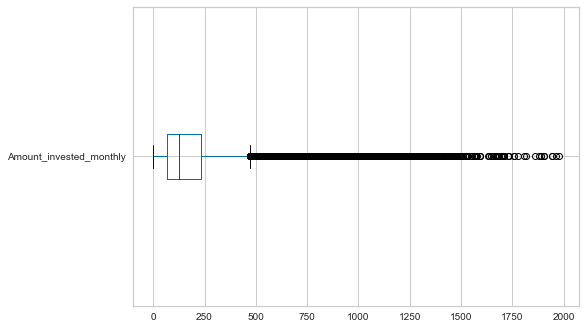

In [353]:
dataset['Amount_invested_monthly'].plot(kind='box', vert=0)


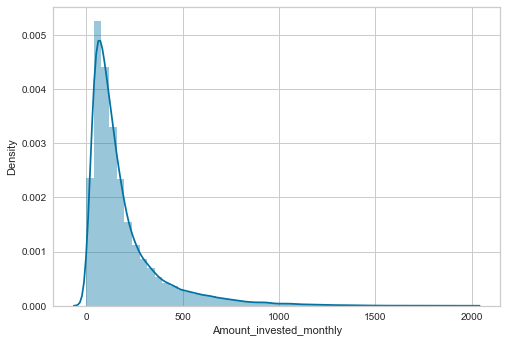

In [354]:
import seaborn as sns
sns.distplot(dataset['Amount_invested_monthly']);

In [355]:
#uzpelniamy grupową modą
dataset['Amount_invested_monthly'] = dataset.groupby('Customer_ID')['Amount_invested_monthly'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN)

In [356]:
#sprawdzenie danych trreningowych
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        70000 non-null  int64  
 1   Customer_ID               70000 non-null  int64  
 2   Month                     70000 non-null  int64  
 3   Name                      70000 non-null  object 
 4   Age                       70000 non-null  float64
 5   SSN                       70000 non-null  float64
 6   Occupation                70000 non-null  object 
 7   Annual_Income             70000 non-null  float64
 8   Monthly_Inhand_Salary     70000 non-null  float64
 9   Num_Bank_Accounts         70000 non-null  float64
 10  Num_Credit_Card           70000 non-null  float64
 11  Interest_Rate             70000 non-null  float64
 12  Num_of_Loan               70000 non-null  float64
 13  Type_of_Loan              70000 non-null  object 
 14  Delay_

## Usuwanie zbędnych kolumn

In [357]:
colToDel = ['ID', 'Name', 'SSN']
dataset = dataset.drop(columns=colToDel)

## One - hot encoding

In [358]:
StringToArray = ''
records = dataset['Type_of_Loan'].unique().tolist()
records = [str(x) for x in records]
mainTypes = [x for x in records if not(',' in x)] # Korzystamy z ',' bo tym znakiem są rozdzielane wartości
mainTypes

['Credit-Builder Loan',
 'Not Specified',
 'Debt Consolidation Loan',
 'Auto Loan',
 'Student Loan',
 'Personal Loan',
 'Home Equity Loan',
 'Payday Loan',
 'Mortgage Loan']

In [359]:
for i in mainTypes : 
    dataset[i] = dataset['Type_of_Loan'].str.contains(i)

del dataset['Type_of_Loan']

In [360]:
dataset = dataset.loc[:, dataset.columns.notnull()]

In [361]:
columns_new = ['Customer_ID', 'Month', 'Age', 'Occupation', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'
        , 'Credit-Builder Loan', 'Not Specified',
       'Debt Consolidation Loan', 'Auto Loan', 'Home Equity Loan',
       'Student Loan', 'Personal Loan', 'Payday Loan', 'Mortgage Loan','Credit_Score']

In [362]:
dataset = dataset.reindex(columns=columns_new)

In [363]:
dataset.drop(columns=['Customer_ID'], inplace=True)
dataset.drop(columns=['Month'], inplace=True)

In [364]:
dataset = dataset[dataset['Credit_Score'].notna()]
dataset.shape

(70000, 31)

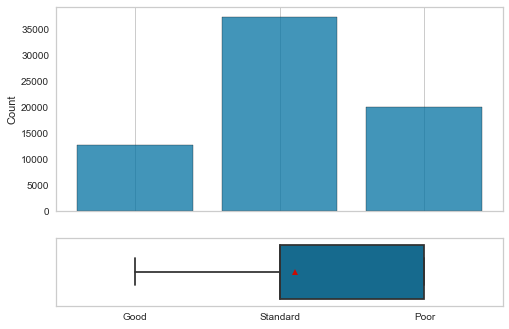

In [365]:
# Rozklad przewidywanych wynikow
import seaborn as sns
import matplotlib.pyplot as plt
fig, (hist, box) = plt.subplots(nrows=2, sharex=True, gridspec_kw={'height_ratios': [3, 1]})
sns.histplot(dataset['Credit_Score'], discrete=True, stat='count', shrink=.8, kde=False, ax=hist).grid(axis='y')

sns.boxplot(pd.factorize(dataset['Credit_Score'])[0], ax=box, showmeans=True).grid(axis='x')

<AxesSubplot:>

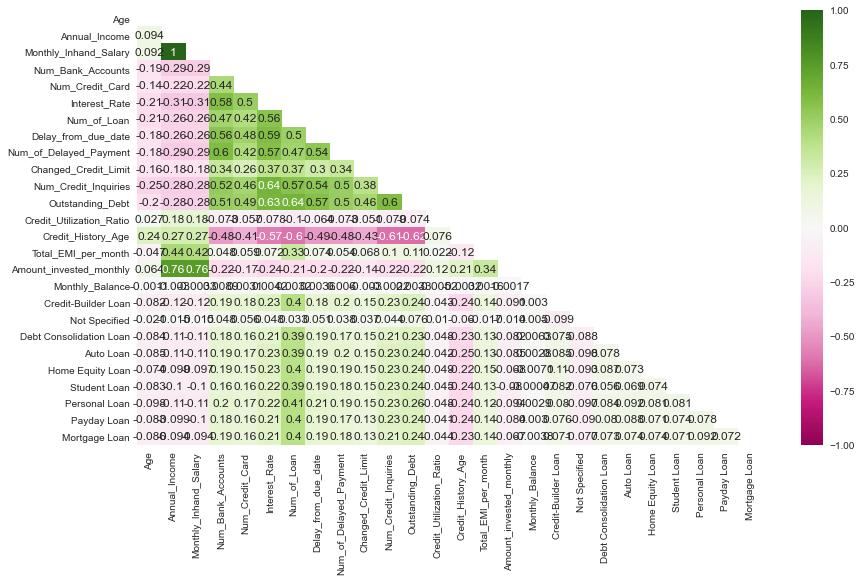

In [366]:
# Correlation between Numerical features
plt.figure(figsize=(14,8))
sns.heatmap(
    dataset.corr(), 
    mask=np.triu(np.ones_like(dataset.corr(), dtype=bool)), 
    annot=True, vmin=-1, vmax=1, cmap="PiYG"
)

## Implementacja modeli

In [207]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline

# Supervised-Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
# conda install -c conda-forge xgboost
from xgboost import XGBClassifier
# Supervised-Classifier-metrics
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score, log_loss
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import  roc_curve, roc_auc_score, auc
from sklearn.metrics import  precision_recall_curve, average_precision_score

# Supervised-cross_validate-GridSearchCV
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

import pickle
random_state=42

In [208]:
dataset.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,21000.0,NaN,NaN,NaN,33.087762,10.715294,14.0,24.0,33.0,41.0,56.0
Occupation,21000,15,Engineer,1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annual_Income,21000.0,NaN,NaN,NaN,51320.485604,39214.772571,7011.685,19657.56,37482.37,71530.8,179948.84
Monthly_Inhand_Salary,21000.0,NaN,NaN,NaN,4261.570004,3257.804148,319.55625,1657.167917,3159.4975,5972.078333,15091.086667
Num_Bank_Accounts,21000.0,NaN,NaN,NaN,5.347952,2.569872,0.0,3.0,5.0,7.0,10.0
Num_Credit_Card,21000.0,NaN,NaN,NaN,5.511333,2.049454,1.0,4.0,5.0,7.0,10.0
Interest_Rate,21000.0,NaN,NaN,NaN,14.50781,8.746801,1.0,7.0,13.0,20.0,34.0
Num_of_Loan,21000.0,NaN,NaN,NaN,3.454857,2.47976,0.0,2.0,3.0,5.0,9.0
Delay_from_due_date,21000.0,NaN,NaN,NaN,20.905,14.656428,-5.0,10.0,18.0,28.0,62.0
Num_of_Delayed_Payment,21000.0,NaN,NaN,NaN,13.225952,6.274871,-2.0,9.0,14.0,18.0,25.0


In [105]:
#pliki zostały zapisane przez nas wcześniej do fromatu csv
train49 = pd.read_csv("train49.csv")
test21 = pd.read_csv("test21.csv")

In [212]:
X_train = train49.drop(columns="Credit_Score")
y_train = train49['Credit_Score']
X_test = test21.drop(columns="Credit_Score")
y_test = test21['Credit_Score']

In [215]:
from sklearn.preprocessing import OneHotEncoder

cat = X_train.select_dtypes(exclude="number").columns.to_list()    
enc = OneHotEncoder(handle_unknown="ignore", sparse=False)

X_train_cat = pd.DataFrame(
    enc.fit_transform(X_train[cat]), index = X_train.index, 
    columns = enc.get_feature_names_out(cat)
)   
X_test_cat  = pd.DataFrame(
    enc.transform(X_test[cat]), index = X_test.index, 
    columns = enc.get_feature_names_out(cat)
)
    
X_train_enc = X_train_cat.join(X_train.select_dtypes("number"))

X_test_enc = X_test_cat.join(X_test.select_dtypes("number"))

X_train_enc.shape, X_test_enc.shape

((49000, 63), (21000, 63))

In [216]:
X_train_enc.columns

Index(['Occupation_Accountant', 'Occupation_Architect', 'Occupation_Developer',
       'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Entrepreneur',
       'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer', 'Credit_Mix_Bad', 'Credit_Mix_Good',
       'Credit_Mix_Standard', 'Payment_of_Min_Amount_NM',
       'Payment_of_Min_Amount_No', 'Payment_of_Min_Amount_Yes',
       'Payment_Behaviour_High_spent_Large_value_payments',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Behaviour_High_spent_Small_value_payments',
       'Payment_Behaviour_Low_spent_Large_value_payments',
       'Payment_Behaviour_Low_spent_Medium_value_payments',
       'Payment_Behaviour_Low_spent_Small_value_payments',
       'Credit-Builder Loan_False', 'Credit-Builder Loan_True',
       'Not Specified_F

In [217]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test  = le.transform(y_test)

pd.DataFrame(y_train).value_counts().sort_index()

0     8834
1    14126
2    26040
dtype: int64

In [218]:
scaler = MinMaxScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_enc), columns=X_train_enc.columns)
X_test_scaled  = pd.DataFrame(scaler.transform(X_test_enc), columns=X_test_enc.columns)

## Multinomial Logistic Regression 

In [219]:
log_model = LogisticRegression(
    class_weight = "balanced",
    random_state=random_state
)

In [220]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [221]:
y_pred_train = log_model.predict(X_train_scaled)
y_pred_test  = log_model.predict(X_test_scaled)
print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.50      0.85      0.63      8834
           1       0.64      0.69      0.67     14126
           2       0.82      0.60      0.69     26040

    accuracy                           0.67     49000
   macro avg       0.66      0.71      0.66     49000
weighted avg       0.71      0.67      0.67     49000

              precision    recall  f1-score   support

           0       0.49      0.84      0.62      3818
           1       0.62      0.68      0.65      5886
           2       0.82      0.59      0.68     11296

    accuracy                           0.66     21000
   macro avg       0.64      0.70      0.65     21000
weighted avg       0.70      0.66      0.66     21000



## Random Forest

In [222]:
from sklearn.preprocessing import OrdinalEncoder

cat = X_train.select_dtypes(exclude="number").columns.to_list()    
enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

X_train[cat] = enc.fit_transform(X_train[cat])
X_test[cat] = enc.transform(X_test[cat])

X_train.shape, X_test.shape

((49000, 31), (21000, 31))

In [223]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(
    class_weight = 'balanced',
    random_state=random_state
)

In [224]:
%%time
rfc_model.fit(X_train, y_train)

Wall time: 13.4 s


RandomForestClassifier(class_weight='balanced', random_state=42)

In [225]:
y_pred_train = rfc_model.predict(X_train)
y_pred_test  = rfc_model.predict(X_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8834
           1       1.00      1.00      1.00     14126
           2       1.00      1.00      1.00     26040

    accuracy                           1.00     49000
   macro avg       1.00      1.00      1.00     49000
weighted avg       1.00      1.00      1.00     49000

              precision    recall  f1-score   support

           0       0.56      0.55      0.55      3818
           1       0.74      0.63      0.68      5886
           2       0.72      0.78      0.75     11296

    accuracy                           0.69     21000
   macro avg       0.67      0.65      0.66     21000
weighted avg       0.69      0.69      0.69     21000



In [226]:
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier(
    class_weight = 'balanced',
    random_state=random_state
)
param_grid = {
    'max_depth': [3], 
    'n_estimators': [10],
    'max_features': [None],
}
# Identify people with low credit scores
recall_poor = make_scorer(recall_score, average = None, labels=[1])
grid_model_rfc = GridSearchCV(
    estimator=model,
    param_grid = param_grid, 
    error_score="raise",
    scoring=recall_poor,
    refit=True,
#     verbose=2,
    n_jobs=-1,
    cv=5,
)

In [227]:
%%time
grid_model_rfc.fit(X_train, y_train)

Wall time: 5.03 s


GridSearchCV(cv=5, error_score='raise',
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3], 'max_features': [None],
                         'n_estimators': [10]},
             scoring=make_scorer(recall_score, average=None, labels=[1]))

In [228]:
grid_model_rfc.best_params_

{'max_depth': 3, 'max_features': None, 'n_estimators': 10}

In [229]:
grid_model_rfc.best_score_

0.7425316874283674

In [230]:
y_pred_train = grid_model_rfc.predict(X_train)
y_pred_test  = grid_model_rfc.predict(X_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.49      0.84      0.62      8834
           1       0.64      0.74      0.69     14126
           2       0.85      0.57      0.69     26040

    accuracy                           0.67     49000
   macro avg       0.66      0.72      0.67     49000
weighted avg       0.73      0.67      0.68     49000

              precision    recall  f1-score   support

           0       0.48      0.82      0.61      3818
           1       0.61      0.72      0.66      5886
           2       0.84      0.57      0.68     11296

    accuracy                           0.66     21000
   macro avg       0.65      0.70      0.65     21000
weighted avg       0.71      0.66      0.66     21000



In [231]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    random_state=random_state,
)

In [232]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
classes_weights

array([1.84891706, 1.84891706, 1.84891706, ..., 1.15626032, 0.62724014,
       1.15626032])

In [233]:
comp = pd.DataFrame(classes_weights)

comp["label"] = pd.DataFrame(y_train).reset_index(drop=True)
comp.groupby("label")[0].value_counts()

label  0       
0      1.848917     8834
1      1.156260    14126
2      0.627240    26040
Name: 0, dtype: int64

In [234]:
%%time
xgb_model.fit(
    X_train, y_train, 
    sample_weight=classes_weights
)
# weight parameter in XGBoost is per instance not per class.

Wall time: 7.27 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [235]:
y_pred_train = xgb_model.predict(X_train)
y_pred_test  = xgb_model.predict(X_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.73      0.95      0.83      8834
           1       0.80      0.93      0.86     14126
           2       0.94      0.76      0.84     26040

    accuracy                           0.85     49000
   macro avg       0.82      0.88      0.84     49000
weighted avg       0.86      0.85      0.85     49000

              precision    recall  f1-score   support

           0       0.53      0.77      0.62      3818
           1       0.66      0.70      0.68      5886
           2       0.79      0.65      0.71     11296

    accuracy                           0.68     21000
   macro avg       0.66      0.70      0.67     21000
weighted avg       0.71      0.68      0.69     21000



In [236]:
from sklearn.model_selection import GridSearchCV

model = XGBClassifier(
    random_state=random_state
)
param_grid = {
    'n_estimators':[50, 100],
}
# Identify people with low credit scores
recall_poor = make_scorer(recall_score, average = None, labels=[1])
grid_model_xgb = GridSearchCV(
    estimator=model,
    param_grid = param_grid, 
    error_score="raise",
    scoring=recall_poor,
    refit=True,
    n_jobs=-1
)

In [237]:
%%time
grid_model_xgb.fit(
    X_train, y_train, 
    sample_weight=classes_weights
)

Wall time: 37.2 s


GridSearchCV(error_score='raise',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     lear...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             n_jobs=-1, param_grid={'n_estimators': [50, 100]},
             scoring=make_scorer(recall_score, average=None, labels=[1]))

In [238]:
y_pred_train = grid_model_xgb.predict(X_train)
y_pred_test  = grid_model_xgb.predict(X_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.62      0.91      0.74      8834
           1       0.76      0.86      0.81     14126
           2       0.91      0.70      0.79     26040

    accuracy                           0.79     49000
   macro avg       0.77      0.83      0.78     49000
weighted avg       0.82      0.79      0.79     49000

              precision    recall  f1-score   support

           0       0.52      0.80      0.63      3818
           1       0.66      0.72      0.69      5886
           2       0.82      0.62      0.71     11296

    accuracy                           0.68     21000
   macro avg       0.66      0.72      0.67     21000
weighted avg       0.72      0.68      0.69     21000



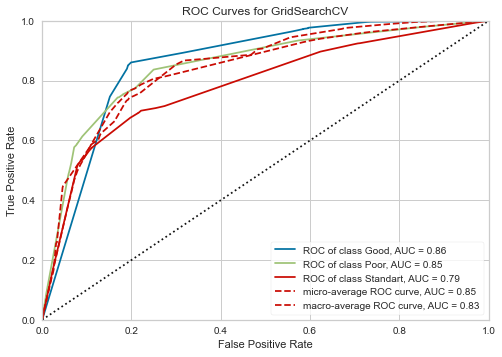

In [242]:
from yellowbrick.classifier import ROCAUC
model = grid_model_rfc

visualizer = ROCAUC(model, encoder={0: 'Good', 1: 'Poor', 2: 'Standart'})
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_train, y_train)        # Evaluate the model on the test data
visualizer.show(); 

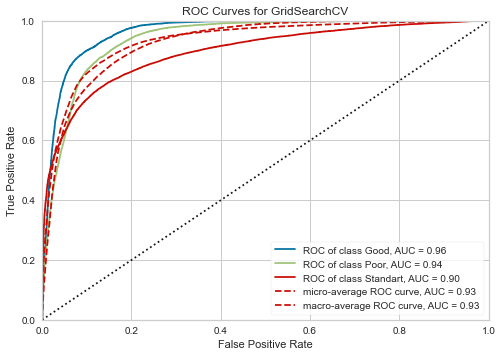

In [243]:
from yellowbrick.classifier import ROCAUC
model = grid_model_xgb

visualizer = ROCAUC(model, encoder={0: 'Good', 1: 'Poor', 2: 'Standart'})
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_train, y_train)        # Evaluate the model on the test data
visualizer.show(); 

In [245]:
xgb_model.feature_importances_

array([0.01108775, 0.01238998, 0.01424056, 0.0146766 , 0.01650296,
       0.02218254, 0.03510967, 0.1366258 , 0.01713121, 0.01700434,
       0.01517068, 0.01975841, 0.01345825, 0.36586252, 0.08704165,
       0.00402297, 0.01077942, 0.01651358, 0.01933551, 0.01472566,
       0.01002159, 0.00603411, 0.01406501, 0.01389461, 0.0123483 ,
       0.01563402, 0.01045423, 0.01112448, 0.01116001, 0.01548799,
       0.01615562], dtype=float32)

<BarContainer object of 31 artists>

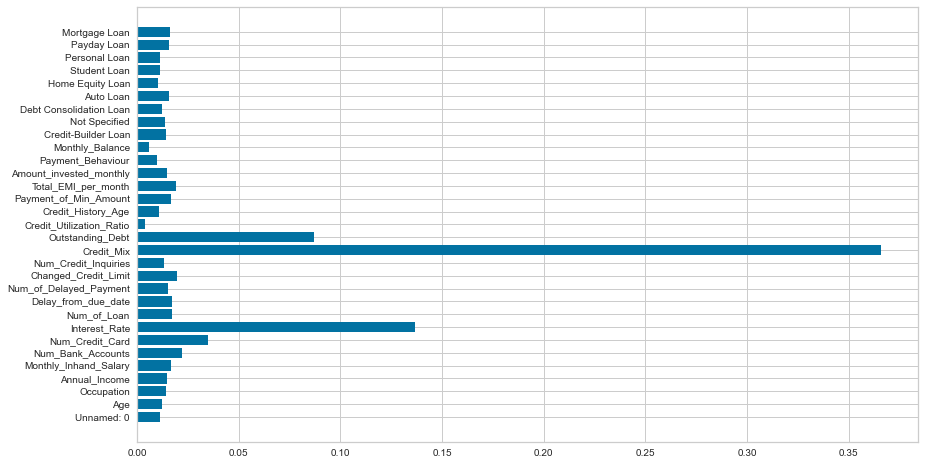

In [246]:
plt.figure(figsize=(14,8))
plt.barh(X_test.columns, xgb_model.feature_importances_)

In [247]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(xgb_model, X_test, y_test)
perm_importance

{'importances_mean': array([ 2.66666667e-04,  8.00000000e-04,  1.07619048e-03,  1.88571429e-03,
         1.85714286e-03,  5.53333333e-03,  1.59047619e-02,  8.02380952e-02,
         3.59047619e-03,  2.80285714e-02,  5.32380952e-03,  1.04857143e-02,
         6.40952381e-03,  1.34895238e-01,  4.57904762e-02,  2.66666667e-04,
         1.35238095e-02,  9.04761905e-04,  1.14666667e-02,  4.16190476e-03,
         2.03809524e-03,  1.55238095e-03, -5.80952381e-04, -5.52380952e-04,
         4.38095238e-04, -2.28571429e-04, -7.61904762e-04,  4.00000000e-04,
         8.57142857e-05,  4.38095238e-04, -5.33333333e-04]),
 'importances_std': array([0.00116666, 0.00050879, 0.00066571, 0.00128045, 0.00142857,
        0.00087308, 0.00112687, 0.00245171, 0.0009431 , 0.00051868,
        0.00083864, 0.00062698, 0.00039567, 0.00219284, 0.00128009,
        0.00070024, 0.00210775, 0.00053791, 0.00116073, 0.00098266,
        0.00070592, 0.00038167, 0.00026836, 0.00013669, 0.00017405,
        0.00012563, 0.000419

Text(0.5, 0, 'Permutation Importance')

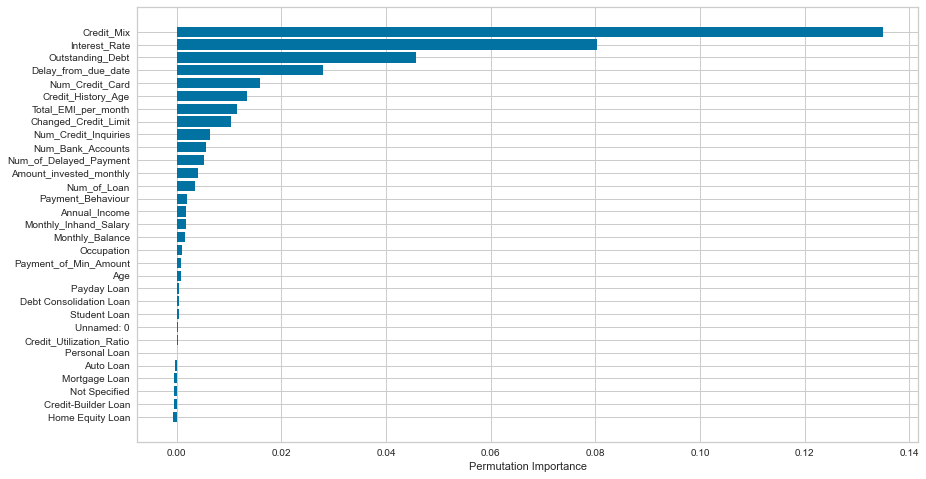

In [248]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(14,8))
plt.barh(X_test.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [249]:
X_test.columns

Index(['Unnamed: 0', 'Age', 'Occupation', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit-Builder Loan', 'Not Specified', 'Debt Consolidation Loan',
       'Auto Loan', 'Home Equity Loan', 'Student Loan', 'Personal Loan',
       'Payday Loan', 'Mortgage Loan'],
      dtype='object')

In [257]:
X_train = X_train[['Credit_Mix', 'Interest_Rate', 'Outstanding_Debt', 'Num_Credit_Card', 'Credit_History_Age',
                  'Total_EMI_per_month', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Num_Bank_Accounts', 'Num_of_Delayed_Payment']]
X_test = X_test[['Credit_Mix', 'Interest_Rate', 'Outstanding_Debt', 'Num_Credit_Card', 'Credit_History_Age',
                  'Total_EMI_per_month', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Num_Bank_Accounts', 'Num_of_Delayed_Payment']]

In [259]:
le = LabelEncoder()
y = le.fit_transform(y_train)

In [263]:
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y)
classes_weights

array([1.84891706, 1.84891706, 1.84891706, ..., 1.15626032, 0.62724014,
       1.15626032])

In [264]:
final_model = XGBClassifier(
    random_state=random_state,
)

In [265]:
%%time
final_model.fit(
    X_train, y_train, 
    sample_weight=classes_weights
)

Wall time: 2.5 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [266]:
y_pred_train = final_model.predict(X_train)
y_pred_test  = final_model.predict(X_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.66      0.93      0.77      8834
           1       0.78      0.89      0.83     14126
           2       0.92      0.72      0.81     26040

    accuracy                           0.81     49000
   macro avg       0.79      0.85      0.80     49000
weighted avg       0.83      0.81      0.81     49000

              precision    recall  f1-score   support

           0       0.50      0.77      0.60      3818
           1       0.64      0.67      0.65      5886
           2       0.80      0.63      0.70     11296

    accuracy                           0.67     21000
   macro avg       0.64      0.69      0.65     21000
weighted avg       0.70      0.67      0.67     21000



# Drugie podejście z randomowym podziałem rekordów na koniec preprocessingu

In [371]:
traintest = pd.read_csv("traintest70.csv")

In [372]:
X = traintest.drop(columns="Credit_Score")
y = traintest['Credit_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

X_train.shape, X_test.shape, y_train.shape

((49000, 31), (21000, 31), (49000,))

In [373]:
X_train_enc.columns

Index(['Occupation_Accountant', 'Occupation_Architect', 'Occupation_Developer',
       'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Entrepreneur',
       'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer', 'Credit_Mix_Bad', 'Credit_Mix_Good',
       'Credit_Mix_Standard', 'Payment_of_Min_Amount_NM',
       'Payment_of_Min_Amount_No', 'Payment_of_Min_Amount_Yes',
       'Payment_Behaviour_High_spent_Large_value_payments',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Behaviour_High_spent_Small_value_payments',
       'Payment_Behaviour_Low_spent_Large_value_payments',
       'Payment_Behaviour_Low_spent_Medium_value_payments',
       'Payment_Behaviour_Low_spent_Small_value_payments',
       'Credit-Builder Loan_False', 'Credit-Builder Loan_True',
       'Not Specified_F

In [374]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test  = le.transform(y_test)

pd.DataFrame(y_train).value_counts().sort_index()

0     8856
1    13986
2    26158
dtype: int64

In [375]:
scaler = MinMaxScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_enc), columns=X_train_enc.columns)
X_test_scaled  = pd.DataFrame(scaler.transform(X_test_enc), columns=X_test_enc.columns)

## Multinomial Logistic Regression 

In [376]:
log_model = LogisticRegression(
    class_weight = "balanced",
    random_state=random_state
)

In [377]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [378]:
y_pred_train = log_model.predict(X_train_scaled)
y_pred_test  = log_model.predict(X_test_scaled)
print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.19      0.37      0.25      8856
           1       0.30      0.33      0.32     13986
           2       0.55      0.34      0.42     26158

    accuracy                           0.35     49000
   macro avg       0.35      0.35      0.33     49000
weighted avg       0.42      0.35      0.36     49000

              precision    recall  f1-score   support

           0       0.19      0.36      0.24      3796
           1       0.28      0.29      0.29      6026
           2       0.53      0.35      0.42     11178

    accuracy                           0.34     21000
   macro avg       0.33      0.33      0.32     21000
weighted avg       0.40      0.34      0.35     21000



Jak widać wyniki dla regresji logistycznej są niezwykle niskie :L

## Random Forest

In [379]:
from sklearn.preprocessing import OrdinalEncoder

cat = X_train.select_dtypes(exclude="number").columns.to_list()    
enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

X_train[cat] = enc.fit_transform(X_train[cat])
X_test[cat] = enc.transform(X_test[cat])

X_train.shape, X_test.shape

((49000, 31), (21000, 31))

In [380]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(
    class_weight = 'balanced',
    random_state=random_state
)

In [381]:
%%time
rfc_model.fit(X_train, y_train)

Wall time: 15.6 s


RandomForestClassifier(class_weight='balanced', random_state=42)

In [382]:
y_pred_train = rfc_model.predict(X_train)
y_pred_test  = rfc_model.predict(X_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8856
           1       1.00      1.00      1.00     13986
           2       1.00      1.00      1.00     26158

    accuracy                           1.00     49000
   macro avg       1.00      1.00      1.00     49000
weighted avg       1.00      1.00      1.00     49000

              precision    recall  f1-score   support

           0       0.78      0.77      0.77      3796
           1       0.81      0.84      0.82      6026
           2       0.83      0.82      0.83     11178

    accuracy                           0.82     21000
   macro avg       0.81      0.81      0.81     21000
weighted avg       0.82      0.82      0.82     21000



In [383]:
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier(
    class_weight = 'balanced',
    random_state=random_state
)
param_grid = {
    'max_depth': [3], 
    'n_estimators': [10],
    'max_features': [None],
}
# Identify people with low credit scores
recall_poor = make_scorer(recall_score, average = None, labels=[1])
grid_model_rfc = GridSearchCV(
    estimator=model,
    param_grid = param_grid, 
    error_score="raise",
    scoring=recall_poor,
    refit=True,
#     verbose=2,
    n_jobs=-1,
    cv=5,
)

In [384]:
%%time
grid_model_rfc.fit(X_train, y_train)

Wall time: 5.37 s


GridSearchCV(cv=5, error_score='raise',
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3], 'max_features': [None],
                         'n_estimators': [10]},
             scoring=make_scorer(recall_score, average=None, labels=[1]))

In [385]:
grid_model_rfc.best_params_

{'max_depth': 3, 'max_features': None, 'n_estimators': 10}

In [386]:
grid_model_rfc.best_score_

0.7378806251873561

In [387]:
y_pred_train = grid_model_rfc.predict(X_train)
y_pred_test  = grid_model_rfc.predict(X_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.49      0.84      0.62      8856
           1       0.63      0.74      0.68     13986
           2       0.85      0.57      0.68     26158

    accuracy                           0.67     49000
   macro avg       0.66      0.71      0.66     49000
weighted avg       0.72      0.67      0.67     49000

              precision    recall  f1-score   support

           0       0.49      0.83      0.62      3796
           1       0.64      0.74      0.69      6026
           2       0.85      0.58      0.69     11178

    accuracy                           0.67     21000
   macro avg       0.66      0.72      0.66     21000
weighted avg       0.73      0.67      0.67     21000



In [388]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    random_state=random_state,
)

In [389]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
classes_weights

array([0.62441063, 1.844324  , 1.844324  , ..., 0.62441063, 1.844324  ,
       1.844324  ])

In [390]:
comp = pd.DataFrame(classes_weights)

comp["label"] = pd.DataFrame(y_train).reset_index(drop=True)
comp.groupby("label")[0].value_counts()

label  0       
0      1.844324     8856
1      1.167835    13986
2      0.624411    26158
Name: 0, dtype: int64

In [391]:
%%time
xgb_model.fit(
    X_train, y_train, 
    sample_weight=classes_weights
)
# weight parameter in XGBoost is per instance not per class.

Wall time: 8.01 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [392]:
y_pred_train = xgb_model.predict(X_train)
y_pred_test  = xgb_model.predict(X_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.69      0.94      0.80      8856
           1       0.79      0.91      0.84     13986
           2       0.93      0.74      0.83     26158

    accuracy                           0.83     49000
   macro avg       0.80      0.86      0.82     49000
weighted avg       0.85      0.83      0.83     49000

              precision    recall  f1-score   support

           0       0.63      0.87      0.73      3796
           1       0.76      0.85      0.80      6026
           2       0.88      0.71      0.79     11178

    accuracy                           0.78     21000
   macro avg       0.76      0.81      0.77     21000
weighted avg       0.80      0.78      0.78     21000



In [393]:
from sklearn.model_selection import GridSearchCV

model = XGBClassifier(
    random_state=random_state
)
param_grid = {
    'n_estimators':[50, 100],
}
# Identify people with low credit scores
recall_poor = make_scorer(recall_score, average = None, labels=[1])
grid_model_xgb = GridSearchCV(
    estimator=model,
    param_grid = param_grid, 
    error_score="raise",
    scoring=recall_poor,
    refit=True,
    n_jobs=-1
)

In [394]:
%%time
grid_model_xgb.fit(
    X_train, y_train, 
    sample_weight=classes_weights
)

Wall time: 45.4 s


GridSearchCV(error_score='raise',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     lear...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             n_jobs=-1, param_grid={'n_estimators': [50, 100]},
             scoring=make_scorer(recall_score, average=None, labels=[1]))

In [395]:
y_pred_train = grid_model_xgb.predict(X_train)
y_pred_test  = grid_model_xgb.predict(X_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.69      0.94      0.80      8856
           1       0.79      0.91      0.84     13986
           2       0.93      0.74      0.83     26158

    accuracy                           0.83     49000
   macro avg       0.80      0.86      0.82     49000
weighted avg       0.85      0.83      0.83     49000

              precision    recall  f1-score   support

           0       0.63      0.87      0.73      3796
           1       0.76      0.85      0.80      6026
           2       0.88      0.71      0.79     11178

    accuracy                           0.78     21000
   macro avg       0.76      0.81      0.77     21000
weighted avg       0.80      0.78      0.78     21000



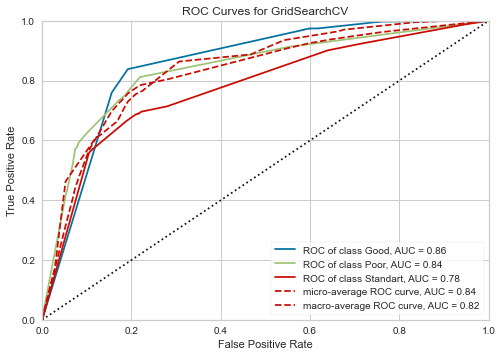

In [396]:
from yellowbrick.classifier import ROCAUC
model = grid_model_rfc

visualizer = ROCAUC(model, encoder={0: 'Good', 1: 'Poor', 2: 'Standart'})
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_train, y_train)        # Evaluate the model on the test data
visualizer.show(); 

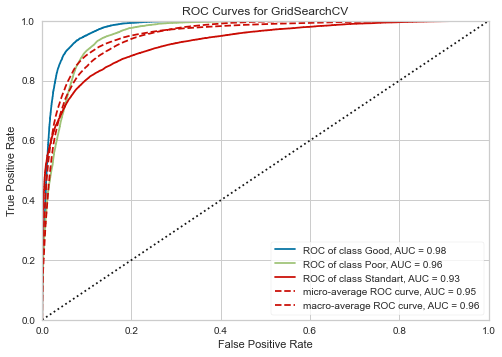

In [397]:
from yellowbrick.classifier import ROCAUC
model = grid_model_xgb

visualizer = ROCAUC(model, encoder={0: 'Good', 1: 'Poor', 2: 'Standart'})
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_train, y_train)        # Evaluate the model on the test data
visualizer.show(); 

In [398]:
xgb_model.feature_importances_

array([0.01130058, 0.01179084, 0.01085768, 0.01330888, 0.0145419 ,
       0.02178514, 0.0349045 , 0.13285424, 0.01584651, 0.01534923,
       0.01582977, 0.01879014, 0.01297658, 0.3898086 , 0.08970367,
       0.00466526, 0.01151394, 0.01710656, 0.01800333, 0.0132338 ,
       0.0097012 , 0.00673736, 0.01345253, 0.01093479, 0.01140542,
       0.01391775, 0.01148457, 0.01310266, 0.01090095, 0.01358508,
       0.0106066 ], dtype=float32)

<BarContainer object of 31 artists>

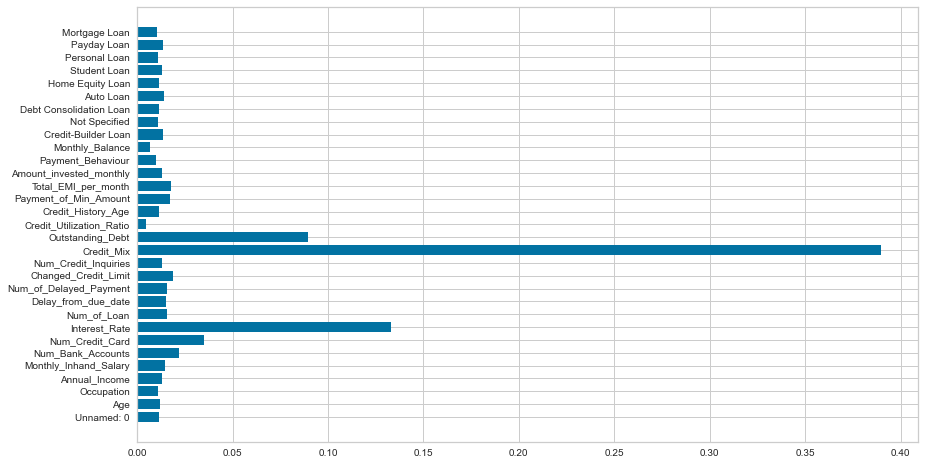

In [399]:
plt.figure(figsize=(14,8))
plt.barh(X_test.columns, xgb_model.feature_importances_)

In [400]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(xgb_model, X_test, y_test)
perm_importance

{'importances_mean': array([ 0.02319048,  0.00907619,  0.00694286,  0.01655238,  0.02031429,
         0.0168381 ,  0.01862857,  0.08644762,  0.00178095,  0.04378095,
         0.01768571,  0.03602857,  0.01190476,  0.15542857,  0.07394286,
         0.00046667,  0.01820952, -0.0025619 ,  0.03102857,  0.02059048,
         0.00549524,  0.00818095,  0.001     ,  0.00104762,  0.00125714,
         0.0006    ,  0.00092381,  0.00030476,  0.00144762,  0.00090476,
         0.00031429]),
 'importances_std': array([0.00094521, 0.00049634, 0.00041228, 0.00070797, 0.00145518,
        0.00064072, 0.00173908, 0.00068717, 0.00088454, 0.00155492,
        0.00104441, 0.00066298, 0.00067545, 0.00214402, 0.00160876,
        0.00050341, 0.00139406, 0.00060639, 0.00088351, 0.00038756,
        0.00074785, 0.00069752, 0.00024467, 0.00054876, 0.00012271,
        0.00052992, 0.0001666 , 0.00040697, 0.00036465, 0.00027766,
        0.00022857]),
 'importances': array([[ 2.40952381e-02,  2.25238095e-02,  2.43809524e

Text(0.5, 0, 'Permutation Importance')

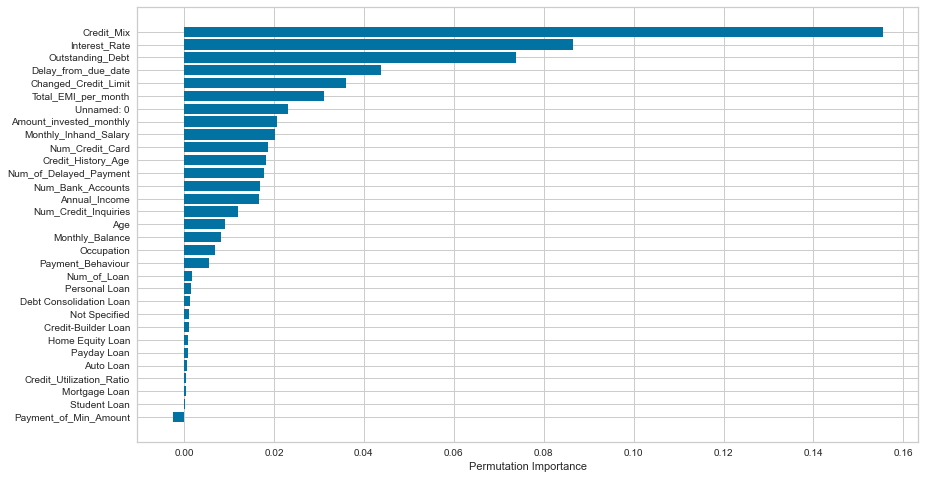

In [401]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(14,8))
plt.barh(X_test.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [402]:
X_test.columns

Index(['Unnamed: 0', 'Age', 'Occupation', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit-Builder Loan', 'Not Specified', 'Debt Consolidation Loan',
       'Auto Loan', 'Home Equity Loan', 'Student Loan', 'Personal Loan',
       'Payday Loan', 'Mortgage Loan'],
      dtype='object')

In [403]:
X_train = X_train[['Credit_Mix', 'Interest_Rate', 'Outstanding_Debt', 'Num_Credit_Card', 'Credit_History_Age',
                  'Total_EMI_per_month', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Num_Bank_Accounts', 'Num_of_Delayed_Payment']]
X_test = X_test[['Credit_Mix', 'Interest_Rate', 'Outstanding_Debt', 'Num_Credit_Card', 'Credit_History_Age',
                  'Total_EMI_per_month', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Num_Bank_Accounts', 'Num_of_Delayed_Payment']]

In [404]:
le = LabelEncoder()
y = le.fit_transform(y_train)

In [405]:
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y)
classes_weights

array([0.62441063, 1.844324  , 1.844324  , ..., 0.62441063, 1.844324  ,
       1.844324  ])

In [406]:
final_model = XGBClassifier(
    random_state=random_state,
)

In [407]:
%%time
final_model.fit(
    X_train, y_train, 
    sample_weight=classes_weights
)

Wall time: 3.58 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [408]:
y_pred_train = final_model.predict(X_train)
y_pred_test  = final_model.predict(X_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.63      0.91      0.74      8856
           1       0.76      0.87      0.81     13986
           2       0.91      0.70      0.79     26158

    accuracy                           0.79     49000
   macro avg       0.77      0.83      0.78     49000
weighted avg       0.82      0.79      0.79     49000

              precision    recall  f1-score   support

           0       0.59      0.86      0.70      3796
           1       0.74      0.83      0.78      6026
           2       0.88      0.68      0.77     11178

    accuracy                           0.76     21000
   macro avg       0.73      0.79      0.75     21000
weighted avg       0.79      0.76      0.76     21000

